In [ ]:
# Import necessary libraries
import pandas as pd
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [ ]:
!pip install -q kaggle  # Step 1: Install Kaggle API

from google.colab import files  # Step 2: Upload kaggle.json file
uploaded = files.upload()

if "kaggle.json" in uploaded:
    !mkdir -p ~/.kaggle  # Step 3: Create directory for Kaggle API key
    !mv kaggle.json ~/.kaggle/  # Move kaggle.json to the appropriate directory
    !chmod 600 ~/.kaggle/kaggle.json  # Set permissions for the file
    !kaggle datasets download -d alexteboul/diabetes-health-indicators-dataset  # Step 4: Download dataset
else:
    print("Please upload the Kaggle API key file (kaggle.json) first.")


Saving kaggle.json to kaggle.json
  0% 0.00/6.03M [00:00<?, ?B/s]
100% 6.03M/6.03M [00:00<00:00, 75.6MB/s]


In [ ]:
import zipfile

# Specify the path to the ZIP file
zip_file_path = '/content/diabetes-health-indicators-dataset.zip'

# Specify the directory where you want to extract the contents
extracted_path = '/content/diabetes-health-indicators-dataset/'

# Unzip the dataset
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

# List the contents of the extracted directory
!ls /content/diabetes-health-indicators-dataset/


diabetes_012_health_indicators_BRFSS2015.csv
diabetes_binary_5050split_health_indicators_BRFSS2015.csv
diabetes_binary_health_indicators_BRFSS2015.csv


In [ ]:
# Specify the file path
file_path = '/content/diabetes-health-indicators-dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv'

# Load the dataset into a Pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [ ]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
# Display basic information about the dataset
df.shape

(70692, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

**Random Forests**

In [ ]:
# Define features set
X = df.copy()
X.drop("Diabetes_binary", axis=1, inplace=True)
X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [ ]:
y = df["Diabetes_binary"]
y[:5]

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Diabetes_binary, dtype: float64

In [ ]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
# Display the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (53019, 21)
Shape of X_test: (17673, 21)
Shape of y_train: (53019,)
Shape of y_test: (17673,)


In [ ]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [ ]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [ ]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

**Fitting the Random Forest Model**

In [ ]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [ ]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

**Making Predictions Using the Random Forest Model**

In [ ]:
# Calculating the confusion matrix
predictions = rf_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [ ]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,6132,2703
Actual 1,1935,6903


Accuracy Score : 0.7375657783058903
Classification Report
              precision    recall  f1-score   support

         0.0       0.76      0.69      0.73      8835
         1.0       0.72      0.78      0.75      8838

    accuracy                           0.74     17673
   macro avg       0.74      0.74      0.74     17673
weighted avg       0.74      0.74      0.74     17673



**Feature Importance**

In [ ]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.17016614603325242, 'BMI'),
 (0.12585930932476258, 'Age'),
 (0.11021540899193581, 'GenHlth'),
 (0.0830435167286249, 'Income'),
 (0.07464462019216297, 'HighBP'),
 (0.06810181509913232, 'PhysHlth'),
 (0.056847450063427424, 'Education'),
 (0.05174905776835716, 'MentHlth'),
 (0.040388542581329685, 'HighChol'),
 (0.028342742123592904, 'Smoker'),
 (0.028226206479178863, 'Fruits'),
 (0.026733474036790206, 'Sex'),
 (0.025917242266527443, 'DiffWalk'),
 (0.023171990286804407, 'PhysActivity'),
 (0.021728945418456217, 'Veggies'),
 (0.019624027890576507, 'HeartDiseaseorAttack'),
 (0.012152518631073852, 'NoDocbcCost'),
 (0.010052282816617426, 'Stroke'),
 (0.009376883187391832, 'HvyAlcoholConsump'),
 (0.007497556461457094, 'AnyHealthcare'),
 (0.006160263618548057, 'CholCheck')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

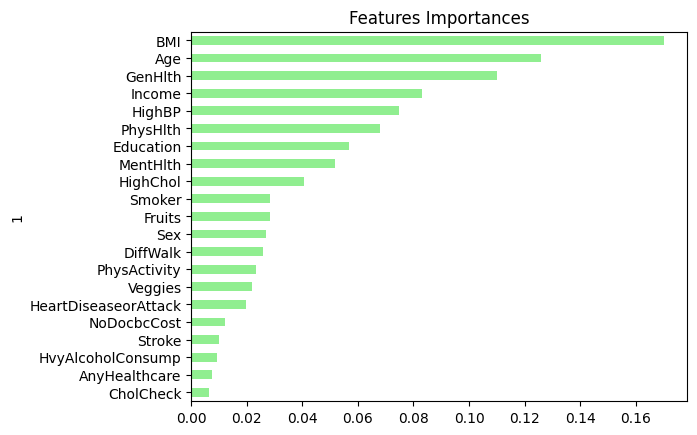

In [ ]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

In [ ]:
column =  ['PhysActivity', 'DiffWalk', 'Veggies', 'HeartDiseaseorAttack', 'NoDocbcCost', 'Stroke', 'HvyAlcoholConsump', 'AnyHealthcare','PhysHlth']
# Drop the specified columns
df_features = df.drop(columns=column)

# Display the first few rows of the DataFrame after dropping columns
df_features.head()
# Export the DataFrame to a CSV file
# df_features.to_csv('/content/modified_dataset.csv', index=False)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Fruits,GenHlth,MentHlth,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,3.0,5.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,3.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,1.0,1.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,1.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,1.0,2.0,0.0,0.0,8.0,5.0,8.0


# Logistic Regression Model

In [ ]:
# Logistic Regression Model Training
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)  # Training on scaled features

# Logistic Regression Model Evaluation
y_pred = log_reg.predict(X_test_scaled)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7479205567815311

Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74      8835
         1.0       0.74      0.77      0.75      8838

    accuracy                           0.75     17673
   macro avg       0.75      0.75      0.75     17673
weighted avg       0.75      0.75      0.75     17673


Confusion Matrix:
[[6451 2384]
 [2071 6767]]


# Deep Learning Model

In [ ]:
!pip install -q -U keras-tuner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.8 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import keras_tuner as kt
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to build the model
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units_1', min_value=16, max_value=128, step=16), activation='relu'))
    model.add(Dense(units=hp.Int('units_2', min_value=16, max_value=128, step=16), activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Initialize the tuner
tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='keras_tuner_logs',
                     project_name='diabetes_prediction')

# Search for the best hyperparameters
tuner.search(X_train, y_train, epochs=50, validation_split=0.2, verbose=1)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# Save the model architecture as JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# Save the model weights
model.save_weights("model_weights.h5")


Trial 30 Complete [00h 00m 46s]
val_accuracy: 0.7428167462348938

Best val_accuracy So Far: 0.7489169836044312
Total elapsed time: 00h 13m 16s
Epoch 1/20
1414/1414 [==============================] - 6s 3ms/step - loss: 0.5564 - accuracy: 0.7199 - val_loss: 0.5457 - val_accuracy: 0.7284
Epoch 2/20
1414/1414 [==============================] - 4s 3ms/step - loss: 0.5302 - accuracy: 0.7356 - val_loss: 0.5238 - val_accuracy: 0.7368
Epoch 3/20
1414/1414 [==============================] - 5s 3ms/step - loss: 0.5220 - accuracy: 0.7411 - val_loss: 0.5182 - val_accuracy: 0.7398
Epoch 4/20
1414/1414 [==============================] - 4s 3ms/step - loss: 0.5180 - accuracy: 0.7439 - val_loss: 0.5134 - val_accuracy: 0.7448
Epoch 5/20
1414/1414 [==============================] - 4s 3ms/step - loss: 0.5156 - accuracy: 0.7446 - val_loss: 0.5215 - val_accuracy: 0.7406
Epoch 6/20
1414/1414 [==============================] - 5s 3ms/step - loss: 0.5143 - accuracy: 0.7448 - val_loss: 0.5123 - val_accuracy: 

In [ ]:
# Evaluate the model using the test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")


442/442 - 1s - loss: 0.5178 - accuracy: 0.7452 - 886ms/epoch - 2ms/step
Test Loss: 0.5177913904190063, Test Accuracy: 0.745172917842865


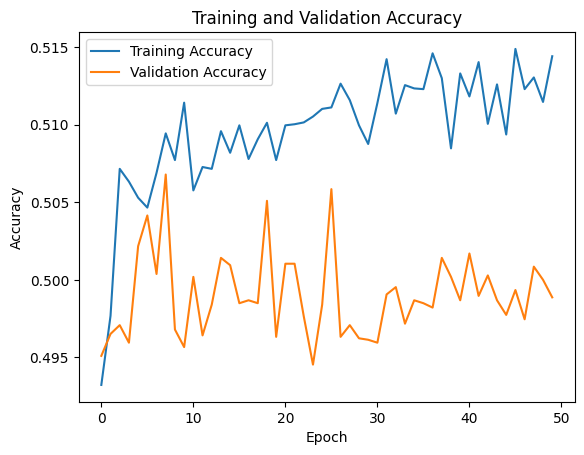

In [ ]:
import matplotlib.pyplot as plt

# Visualize training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

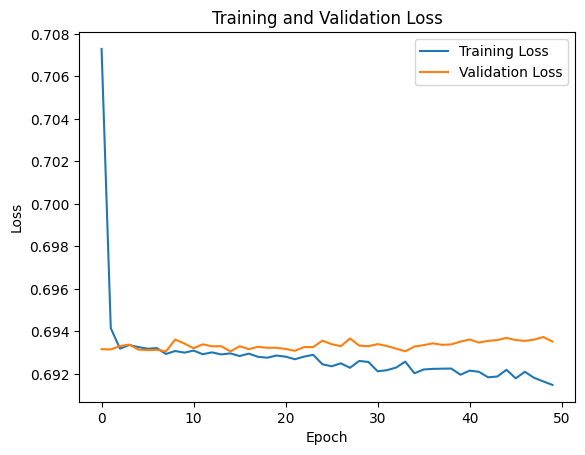

In [ ]:
# Visualize training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()